In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2022-10-17 20:09:35.497928: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 20:09:39.540989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 20:09:39.541046: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-17 20:09:39.897377: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-17 20:09:51.263739: W tensorflow/stream_executor/platform/de

In [2]:
model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

2022-10-17 20:10:22.636813: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-17 20:10:22.639806: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-17 20:10:22.639861: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (16f9722b7186): /proc/driver/nvidia/version does not exist
2022-10-17 20:10:22.646049: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
labels = {}
with open("imagenet1000_clsidx_to_labels.txt") as f:
    for line in f:
        (key, val) = line.split(sep=":")
        labels[int(key)] = val[2:-3]

1/1 [==============================] - 2s 2s/step


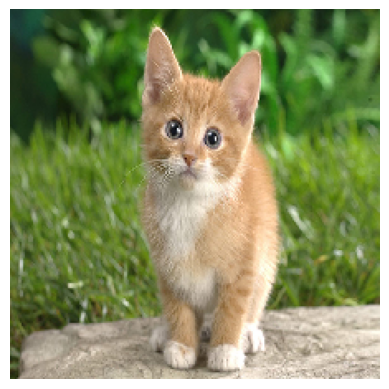

In [4]:
IMAGE_PATH = './images/1.jpg'
img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(img)
data = ([img],None)
index = np.argmax(model.predict(np.array([img])))
plt.imshow(img/255)
plt.axis('off')
plt.show()

In [5]:
from tf_explain.core.grad_cam import GradCAM
method = "GradCAM"
explainer = GradCAM()
grid = explainer.explain(data, model, layer_name='block5_conv3', class_index=index)

ImportError: TF-explain requires Opencv. Install Opencv via `pip install opencv-python`